In [1]:
%matplotlib inline

In [2]:
import sys 
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import cv2

from blurnet.utils import dataloader

In [3]:
def imshow(img, filename=''):
    img = img / 2 + 0.5     # unnormalize
    if type(img) == torch.Tensor:
        img = img.numpy()
        plt.imshow(np.transpose(img, (1, 2, 0)))
    else:  # if type(img) == numpy.ndarray
        plt.imshow(img)
    # plt.xticks([])  # if you want to remove scale axes
    # plt.yticks([])
    if filename:
        plt.savefig(filename)  # added for saving the image
    plt.show()

In [4]:
trainloader, testloader, classes = dataloader(32)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

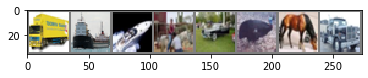

In [6]:
# show images
imshow(torchvision.utils.make_grid(images))

In [7]:
images.size()

torch.Size([8, 3, 32, 32])

In [8]:
img = images[0]

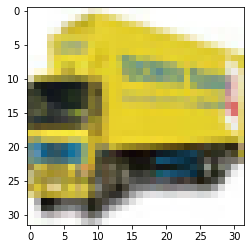

In [9]:
imshow(img, 'figure.png')

---
# cv2.GaussianBlur
dalaloaderによって複数の画像が出力される。(32,32)で小さい。  
しかし、cv2.GaussianBlurは一枚ずつ（のはず）。

In [10]:
# img = img / 2 + 0.5 
npimg = img.numpy()
npimg.shape

(3, 32, 32)

In [11]:
# parameters
kernel_size=(7, 7)
sigma= 1

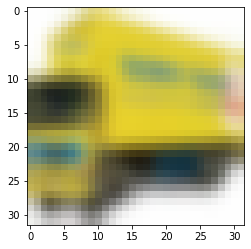

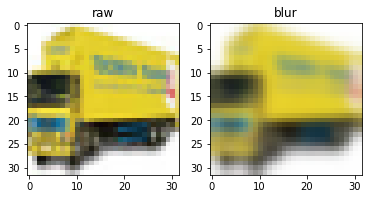

In [12]:
blurfile = 'blur_s1_k3-3.png'
blur = cv2.GaussianBlur(npimg.transpose(1, 2, 0), kernel_size, sigma)
# cv2.imwrite('./blur_s3_k9-9.png', blur)
imshow(blur)

npimg = npimg / 2 + 0.5 
blur = blur / 2 + 0.5 
fig, axes = plt.subplots(1, 2)
axes[0].imshow(npimg.transpose(1, 2, 0))
axes[0].set_title('raw')
axes[1].imshow(blur)
axes[1].set_title('blur')
plt.savefig('./compare.png')
plt.show(fig)
# show and save an image


In [13]:
np.square(npimg.transpose(1, 2, 0) - blur).sum()

21.60914

In [14]:
np.allclose(npimg.transpose(1, 2, 0), blur)

False

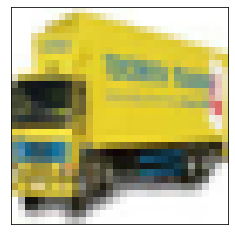

In [15]:
plt.xticks([])
plt.yticks([])
plt.imshow(npimg.transpose(1, 2, 0))
plt.savefig('raw_cat.png')  # added for saving the image
plt.show()

# 関数作成
`GaussianBlur_images`は複数の画像をぼかす。

In [16]:
def GaussianBlur_images(imgs, kernel_size, sigma):
    npimgs = imgs.numpy()
    imgs_list = []
    for img in npimgs:
         imgs_list.append(cv2.GaussianBlur(img.transpose(1, 2, 0), kernel_size, sigma))
    blurred_imgs = np.array(imgs_list)
    blurred_imgs = blurred_imgs.transpose(0, 3, 1, 2)
    return  torch.from_numpy(blurred_imgs)  # shape=(4, 3, 32, 32)

In [17]:
images, labels = dataiter.next()

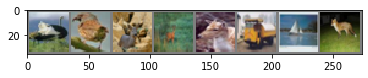

In [18]:
imshow(torchvision.utils.make_grid(images))

In [19]:
b_imgs = GaussianBlur_images(images, kernel_size, sigma)

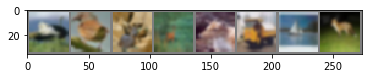

In [20]:
imshow(torchvision.utils.make_grid(b_imgs))

# torch tensorをそのままぼかす
無理だった

## kernel_size = (1, 1) だとぼかしは効かない

In [21]:
kernel_size = (1, 1)
sigma = 100

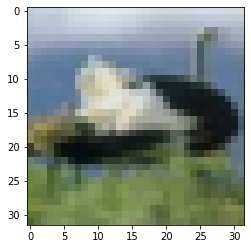

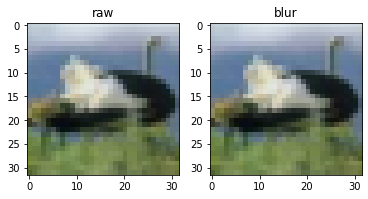

In [22]:
img = images[0]
npimg = img.numpy()
# blurfile = 'blur_s1_k3-3.png'
blur = cv2.GaussianBlur(npimg.transpose(1, 2, 0), kernel_size, sigma)
# cv2.imwrite('./blur_s3_k9-9.png', blur)
imshow(blur)

npimg = npimg / 2 + 0.5 
blur = blur / 2 + 0.5 
fig, axes = plt.subplots(1, 2)
axes[0].imshow(npimg.transpose(1, 2, 0))
axes[0].set_title('raw')
axes[1].imshow(blur)
axes[1].set_title('blur')
# plt.savefig('./compare.png')
plt.show(fig)


In [23]:
np.square(npimg.transpose(1, 2, 0) - blur).sum()

0.0

In [24]:
np.allclose(npimg.transpose(1, 2, 0), blur)

True